<a href="https://colab.research.google.com/github/Olifira/-/blob/main/%D0%BB%D0%B0%D0%B16_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%BE%D0%BB%D0%B8%D1%84%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std #среднеквадратичное (стандартное) отклонение значений элементов массива
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
seed(1) # инициализирует генератор или по другому - задает его начальное состояние
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


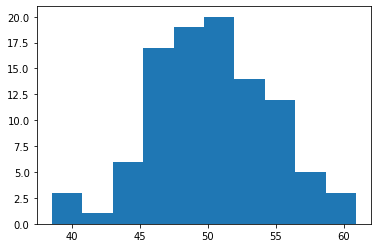

In [ ]:

seed(1)
data = 5 * randn(100) + 50
pyplot.hist(data)
pyplot.show()

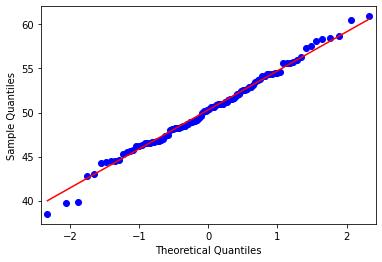

In [ ]:

seed(1)
data = 5 * randn(100) + 50
qqplot(data, line = 's')
pyplot.show()

Тест Шапиро-Вилка

In [ ]:
seed(1)
data = 5 * randn(100) + 50
stat, p = shapiro(data)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.992, p = 0.822
Sample looks Gaussian (fail to reject HO)


In [ ]:
seed(1)
data = 5 * randn(100) + 50
stat, p = normaltest(data)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.102, p = 0.950
Sample looks Gaussian (fail to reject HO)


Тест Андерсона-Дарлинга

In [ ]:
seed(1)
data = 5 * randn(100) + 50
result = anderson(data)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject HO)
10.000: 0.632, data looks normal (fail to reject HO)
5.000: 0.759, data looks normal (fail to reject HO)
2.500: 0.885, data looks normal (fail to reject HO)
1.000: 1.053, data looks normal (fail to reject HO)


# **ИНДИВИДУАЛЬНОЕ** **ЗАДАНИЕ**

Вариант 1

In [12]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1]
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,"$68,075,573",2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,"$66,000,000",2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,"$55,639,114",2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,"$47,500,000",2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,"$42,918,532",2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     object
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [14]:
df['Gross']=df['Gross'].str.replace(r"$","").str.replace(r",","")
df['Gross']=df['Gross'].astype('int64')
df.info()
df.drop(['Rank','Title', 'Genre', 'Details', 'Director'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     int64 
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.8+ KB


In [15]:
df.head()

,Gross,Year
0,68075573,2013
1,66000000,2017
2,55639114,2007
3,47500000,2019
4,42918532,2006


In [16]:
nmp_gross = df['Gross'].to_numpy()
nmp_year = df['Year'].to_numpy()
nmp_gross

array([68075573, 66000000, 55639114, 47500000, 42918532, 39539416,
       38135878, 38067427, 33951015, 31505876, 30496695, 29523237,
       27908763, 27544905, 26231525, 25646739, 25555809, 24965362,
       24830497, 23305571, 22772019, 22213287, 21500000, 21015154,
       20962988, 19390136, 19010585, 18500000, 18400000, 17808683])

Гистограммы

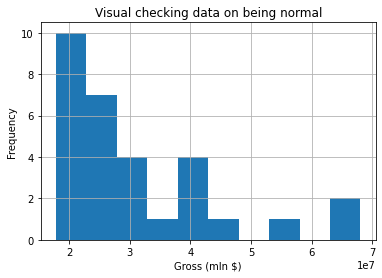

In [17]:
nmp_gross_sorted = np.sort(nmp_gross)
fig, ax = plt.subplots()
ax.hist(nmp_gross_sorted)
ax.set_xlabel('Gross (mln $)')
ax.set_ylabel('Frequency')
ax.set_title('Visual checking data on being normal')
ax.grid(True)
plt.show()

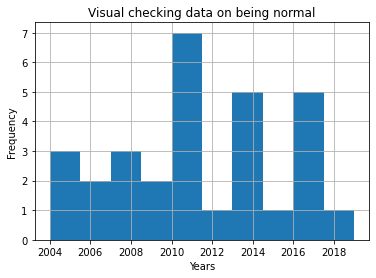

In [18]:
nmp_year_sorted = np.sort(nmp_year)
fig, ax = plt.subplots()
ax.hist(nmp_year_sorted)
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
ax.set_title('Visual checking data on being normal')
ax.grid(True)
plt.show()

QQ

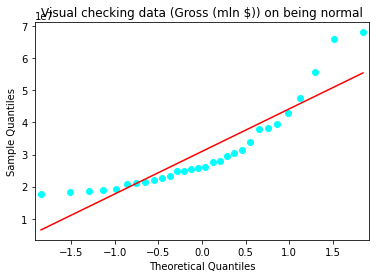

In [19]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(nmp_gross_sorted, line = 's',color='cyan')
pyplot.title('Visual checking data (Gross (mln $)) on being normal')
pyplot.show()

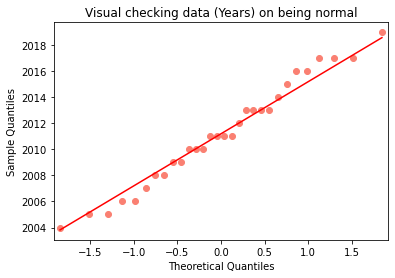

In [20]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(nmp_year_sorted, line = 's',color='salmon')
pyplot.title('Visual checking data (Years) on being normal')
pyplot.show()

Тест Шапиро-Вилка

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(nmp_gross_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.820, p = 0.000
Sample does not look Gaussian (reject HO)


In [22]:
from scipy.stats import shapiro

stat, p = shapiro(nmp_year_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.971, p = 0.566
Sample looks Gaussian (fail to reject HO)


Тест Андерсона-Дарлинга

In [23]:
from scipy.stats import anderson
result = anderson(nmp_gross_sorted)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 1.799
15.000: 0.521, data does not look normal (reject HO)
10.000: 0.593, data does not look normal (reject HO)
5.000: 0.712, data does not look normal (reject HO)
2.500: 0.830, data does not look normal (reject HO)
1.000: 0.988, data does not look normal (reject HO)


In [24]:
from scipy.stats import anderson

result = anderson(nmp_year_sorted)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 0.257
15.000: 0.521, data looks normal (fail to reject HO)
10.000: 0.593, data looks normal (fail to reject HO)
5.000: 0.712, data looks normal (fail to reject HO)
2.500: 0.830, data looks normal (fail to reject HO)
1.000: 0.988, data looks normal (fail to reject HO)


Тест Д'Агостино

In [25]:
from scipy.stats import normaltest

stat, p = normaltest(nmp_gross_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=13.588, p = 0.001
Sample does not look Gaussian (reject HO)


In [26]:
from scipy.stats import normaltest

stat, p = normaltest(nmp_year_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=1.499, p = 0.473
Sample looks Gaussian (fail to reject HO)
